In [ ]:
import torch

from app.vision.dense_cap import detection_utils as utils
from lib.mnist_aug.mnist_augmenter import DataManager, MNISTAug

In [ ]:
dm = DataManager()
dm.load_test()

In [ ]:
aug = MNISTAug()
x, y = aug.get_augmented(dm.x_test, dm.y_test, 2)

In [ ]:
x = torch.tensor(x,  dtype=torch.float32).view((-1, 1, 112, 112))

In [9]:
y[0][0]

{'id': 0,
 'class': 7,
 'class_one_hot': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'x1': 45,
 'y1': 65,
 'x2': 74,
 'y2': 94,
 'cx': 59.5,
 'cy': 79.5,
 'height': 29,
 'width': 29,
 'type': 'number'}

/home/ak/Repos/ml_gallery/ml_py/lib/mnist_aug/mnist_augmenter.py:444: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


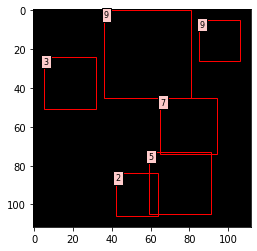

In [10]:

H = 14
W = 14
k = 9

i = 0

y_ = utils.labels_to_tensor(y[i], 112, 112)

anchors_tensor = utils.generate_anchors(shape=(W, H), sizes=(.15, .45, .75), ratios=(0.5, 1, 2))

DataManager.plot_num(torch.ones((112, 112)), y[0])

iou = utils.get_iou_map(y_, anchors_tensor)

In [30]:
confidences, diffs = utils.get_labels(iou, y_, anchors_tensor, k, H, W, confidence_threshold=0.6)

In [31]:
torch.nonzero(confidences > 0.3)

tensor([[ 3, 13,  8],
        [ 4,  0,  3],
        [ 4,  8,  8],
        [ 4,  9,  3],
        [ 5,  3,  8]])

In [32]:
torch.nonzero(confidences <= 0.3).shape

torch.Size([1759, 3])

In [7]:
y_[i].shape

torch.Size([6])

In [59]:
positive_anchor_indices = torch.nonzero(confidences == 1).T

In [60]:
positive_anchor_indices

tensor([[ 3,  4,  4,  4,  5],
        [13,  0,  8,  9,  3],
        [ 8,  3,  8,  3,  8]])

In [57]:
diffs[positive_anchor_indices[0], positive_anchor_indices[1], positive_anchor_indices[2]]

tensor([ 0.0496, -0.1091,  0.0496, -0.1091,  0.0496])

In [45]:
diffs.shape

torch.Size([36, 14, 14])

In [62]:
len_positives = positive_anchor_indices.shape[1]
len_positives

5

In [77]:
cx_indices = positive_anchor_indices
cy_indices = torch.stack((positive_anchor_indices[0] + torch.ones(len_positives) * k, positive_anchor_indices[1], positive_anchor_indices[2])).type(torch.long)
w_indices = torch.stack((positive_anchor_indices[0] + torch.ones(len_positives) * 2 * k, positive_anchor_indices[1], positive_anchor_indices[2])).type(torch.long)
h_indices = torch.stack((positive_anchor_indices[0] + torch.ones(len_positives) * 3 * k, positive_anchor_indices[1], positive_anchor_indices[2])).type(torch.long)

In [108]:
cx_diffs = diffs[tuple(cx_indices)]
cy_diffs = diffs[tuple(cy_indices)]
w_diffs = diffs[tuple(w_indices)]
h_diffs = diffs[tuple(h_indices)]

In [ ]:

def unravel_index(index, shape):
    out = []
    for dim in reversed(shape):
        out.append((index % dim).numpy())
        index = index // dim
    return list(reversed(out))

In [95]:
def ravel_indices(indices, shape):
    dims = len(shape)
    shape = list(shape[1:])
    shape.append(1)
    product = 1
    index = 0
    for i in range(dims -1, -1, -1):
        product *= shape[i]
        index += indices[i] * product
    return index


In [96]:
idx = positive_anchor_indices.T[3]
anchor_idx = ravel_indices(idx, diffs.shape)

In [97]:
idx, anchor_idx

(tensor([4, 9, 3]), tensor(913))

In [102]:
iou.argmax(0)[913]

tensor(1)

In [103]:
anchors_tensor.shape



torch.Size([4, 1764])

In [104]:
anchors_tensor[:, anchor_idx]

tensor([0.2500, 0.5357, 0.4500, 0.4500])

In [109]:
cx_diffs


tensor([ 0.0496, -0.1091,  0.0496, -0.1091,  0.0496])